In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


**Importing the dataset**

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df=df.drop(columns=["User ID","Gender"])

In [5]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [6]:
x=df.drop(columns=["Purchased"])
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y=df.Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

**Feature Scaling**

In [33]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid=GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[1,2,3,4,5,6,7,8,9,10,20,30,40,50]},cv=10)

In [37]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                         40, 50]})

In [38]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001036,0.002426,0.002856,0.003038,1,{'n_neighbors': 1},0.964286,0.964286,0.928571,0.857143,0.821429,0.857143,0.857143,0.928571,0.964286,0.928571,0.907143,0.051010,10
1,0.000799,0.002397,0.003203,0.003924,2,{'n_neighbors': 2},0.857143,1.000000,0.928571,0.821429,0.857143,0.785714,0.821429,0.928571,0.964286,0.928571,0.889286,0.066720,13
2,0.000310,0.000929,0.003923,0.006310,3,{'n_neighbors': 3},0.964286,1.000000,0.928571,0.857143,0.964286,0.928571,0.857143,0.892857,0.964286,0.964286,0.932143,0.046429,1
3,0.003126,0.006252,0.001563,0.004688,4,{'n_neighbors': 4},0.964286,1.000000,0.892857,0.857143,0.857143,0.928571,0.857143,0.892857,0.964286,0.964286,0.917857,0.050634,5
4,0.000000,0.000000,0.001590,0.004770,5,{'n_neighbors': 5},0.964286,1.000000,0.892857,0.857143,0.857143,0.928571,0.857143,0.857143,0.964286,0.964286,0.914286,0.053452,8
5,0.002363,0.005024,0.002479,0.003793,6,{'n_neighbors': 6},0.964286,1.000000,0.892857,0.857143,0.892857,0.964286,0.857143,0.857143,0.964286,0.964286,0.921429,0.052489,4
6,0.000000,0.000000,0.002399,0.003665,7,{'n_neighbors': 7},0.964286,1.000000,0.964286,0.857143,0.892857,0.928571,0.857143,0.857143,0.964286,0.964286,0.925000,0.051632,3
7,0.001600,0.003200,0.002401,0.003668,8,{'n_neighbors': 8},0.964286,1.000000,0.892857,0.857143,0.857143,0.928571,0.857143,0.892857,0.964286,0.964286,0.917857,0.050634,5
8,0.000000,0.000000,0.003998,0.003998,9,{'n_neighbors': 9},0.964286,1.000000,0.928571,0.857143,0.928571,0.928571,0.892857,0.857143,0.964286,0.964286,0.928571,0.045175,2
9,0.000000,0.000000,0.004003,0.004003,10,{'n_neighbors': 10},0.964286,1.000000,0.928571,0.857143,0.821429,0.928571,0.857143,0.892857,0.964286,0.964286,0.917857,0.055443,5


In [39]:
grid.best_params_

{'n_neighbors': 3}

In [40]:
grid.best_score_

0.9321428571428569

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
knn.score(X_test, y_test)

0.875

**Predicting the Test set results**

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[71,  8],
       [ 7, 34]], dtype=int64)

**Making the Confusion Matrix**

Text(58.222222222222214, 0.5, 'Truth')

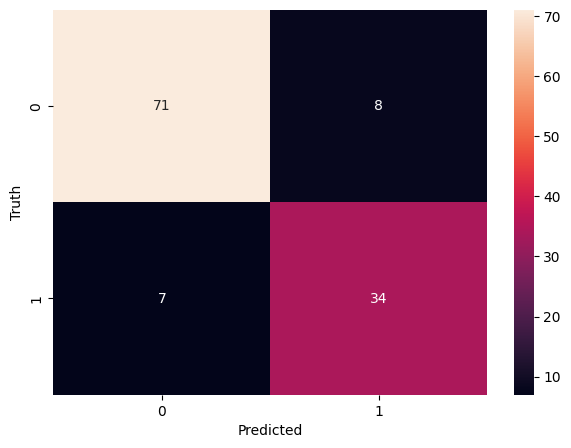

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')